# ABM

In [1]:
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import rasterio
import rasterstats
from rasterio.plot import show
from rasterio.plot import show_hist

import os
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import seaborn as sns
import pyproj

from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

In [2]:
sugar=pd.read_csv("Sugarscape_2.csv")

In [3]:
sugar.head()

,run_number,growback,initial_population,step,count_turtles,max_min_range,survive,top_20,top_40,med_20,low_40,low_20,mean_vision,mean_metabolism
0,1,0.2,200,0,200,15.0,1.0,0.275528,0.233862,0.196596,0.161972,0.132042,3.4850,2.465
1,1,0.2,200,1,200,22.0,1.0,0.281075,0.235016,0.193977,0.163567,0.126366,3.4850,2.465
2,7,0.4,400,0,400,15.0,1.0,0.276431,0.238318,0.195824,0.161945,0.127482,3.3425,2.520
3,11,0.6,200,0,200,15.0,1.0,0.271566,0.235528,0.207435,0.161180,0.124291,3.3550,2.265
4,1,0.2,200,2,200,29.0,1.0,0.292327,0.236167,0.197446,0.164637,0.109423,3.4850,2.465


In [4]:
step=[0,30,60,90,120,150]
sugar_step=sugar[sugar["step"].isin(step)]

In [5]:
sugar_step

,run_number,growback,initial_population,step,count_turtles,max_min_range,survive,top_20,top_40,med_20,low_40,low_20,mean_vision,mean_metabolism
0,1,0.2,200,0,200,15.0,1.000,0.275528,0.233862,0.196596,0.161972,0.132042,3.485000,2.465000
2,7,0.4,400,0,400,15.0,1.000,0.276431,0.238318,0.195824,0.161945,0.127482,3.342500,2.520000
3,11,0.6,200,0,200,15.0,1.000,0.271566,0.235528,0.207435,0.161180,0.124291,3.355000,2.265000
5,8,0.4,600,0,600,15.0,1.000,0.274663,0.237861,0.197110,0.162620,0.127746,3.501667,2.531667
6,3,0.2,600,0,600,15.0,1.000,0.275247,0.237077,0.199482,0.163997,0.124197,3.470000,2.531667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14986,95,3.8,1000,120,567,361.2,0.567,0.412508,0.283503,0.181040,0.103509,0.019440,3.797178,1.827160
15045,99,4.0,800,150,452,474.0,0.565,0.465697,0.290554,0.198214,0.030379,0.015156,3.676991,1.951327
15068,95,3.8,1000,150,562,445.6,0.562,0.412760,0.286627,0.178387,0.105696,0.016531,3.797153,1.807829
15069,100,4.0,1000,120,606,384.0,0.606,0.427654,0.289099,0.195074,0.069337,0.018836,3.757426,1.897690


In [6]:
sugar_150=sugar_step[sugar_step["step"]==150]

In [7]:
sugar_150

,run_number,growback,initial_population,step,count_turtles,max_min_range,survive,top_20,top_40,med_20,low_40,low_20,mean_vision,mean_metabolism
891,11,0.6,200,150,131,355.8,0.655000,0.333739,0.304583,0.205080,0.127712,0.028885,3.801527,1.748092
1476,4,0.2,800,150,202,98.6,0.252500,0.253389,0.240391,0.215632,0.185125,0.105463,3.747525,1.000000
1488,8,0.4,600,150,254,211.2,0.423333,0.382598,0.332624,0.182530,0.070863,0.031385,3.940945,1.484252
1507,6,0.4,200,150,109,321.0,0.545000,0.336859,0.307223,0.195541,0.131760,0.028617,4.000000,1.623853
1543,7,0.4,400,150,179,263.2,0.447500,0.351210,0.294550,0.189734,0.114728,0.049778,3.597765,1.486034
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14893,94,3.8,800,150,436,450.2,0.545000,0.417493,0.293769,0.179828,0.092606,0.016304,3.685780,1.837156
14956,98,4.0,600,150,392,470.0,0.653333,0.443820,0.282235,0.196208,0.061476,0.016261,3.673469,1.984694
15045,99,4.0,800,150,452,474.0,0.565000,0.465697,0.290554,0.198214,0.030379,0.015156,3.676991,1.951327
15068,95,3.8,1000,150,562,445.6,0.562000,0.412760,0.286627,0.178387,0.105696,0.016531,3.797153,1.807829


<StemContainer object of 3 artists>

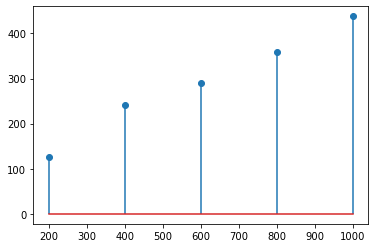

In [8]:
sugar_150_1=sugar_150[sugar_150["growback"]==1]
# sugar_150_1=sugar_150_1.groupby('growback')
plt.stem(sugar_150_1["initial_population"],sugar_150_1["count_turtles"])
# plt.xticks( sugar_150_1["initial_population"])


<StemContainer object of 3 artists>

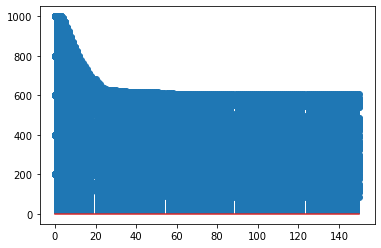

In [9]:
plt.stem(sugar["step"],sugar["count_turtles"])

In [10]:
# plt.fill_between(sugar["step"],sugar["count_turtles"], color="skyblue", alpha=0.2)
# plt.plot(sugar["step"],sugar_step["count_turtles"], color="Slateblue", alpha=0.6)

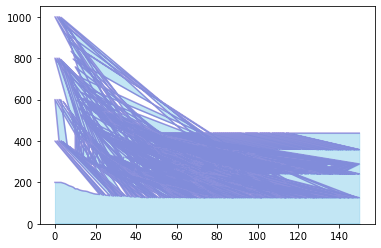

In [11]:
sugar_growback_1=sugar[sugar["growback"]==1]
plt.stackplot(sugar_growback_1["step"],sugar_growback_1["count_turtles"], color="skyblue", alpha=0.5)
plt.plot(sugar_growback_1["step"],sugar_growback_1["count_turtles"], color="Slateblue", alpha=0.6)

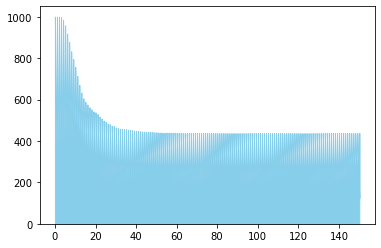

In [12]:
sugar_growback_1=sugar_growback_1.sort_values(["step",'count_turtles'],ascending=True)
plt.stackplot(sugar_growback_1["step"],sugar_growback_1["count_turtles"], color="skyblue", alpha=1)

### 基本介绍，population，mean_vision，mean_matabolism

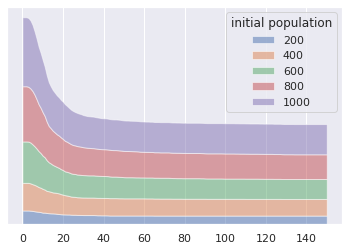

In [13]:
sugar_toushi=sugar_growback_1.pivot_table(index="step",columns= "initial_population",values="count_turtles")
y_label=[sugar_toushi[200],sugar_toushi[400],sugar_toushi[600],sugar_toushi[800],sugar_toushi[1000]]
sns.set_theme()
plt.stackplot(range(0,151),y_label, alpha=0.5,labels=['200','400','600','800','1000'],baseline='zero')
plt.legend(loc='upper right',title="initial population")
plt.yticks([])  # 去掉y轴
plt.show()

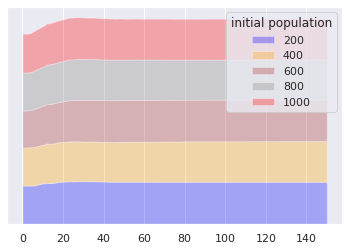

In [14]:
sugar_toushi=sugar_growback_1.pivot_table(index="step",columns= "initial_population",values="mean_vision")
y_label=[sugar_toushi[200],sugar_toushi[400],sugar_toushi[600],sugar_toushi[800],sugar_toushi[1000]]
plt.stackplot(range(0,151),sugar_toushi[200],sugar_toushi[400],sugar_toushi[600],sugar_toushi[800],sugar_toushi[1000], alpha=0.3,colors =['blue', 'orange',
                       'brown',"grey","red"],labels=['200','400','600','800','1000'],)
plt.legend(loc='upper right',title="initial population")
plt.yticks([])  # 去掉y轴
plt.show()

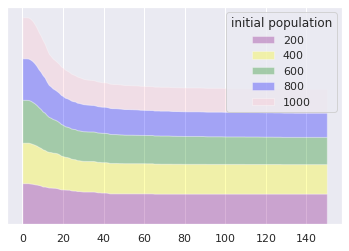

In [15]:
sugar_toushi=sugar_growback_1.pivot_table(index="step",columns= "initial_population",values="mean_metabolism")
y_label=[sugar_toushi[200],sugar_toushi[400],sugar_toushi[600],sugar_toushi[800],sugar_toushi[1000]]
plt.stackplot(range(0,151),sugar_toushi[200],sugar_toushi[400],sugar_toushi[600],sugar_toushi[800],sugar_toushi[1000], alpha=0.3,colors =['purple', 'yellow',
                       'green',"blue","pink"],labels=['200','400','600','800','1000'],)
plt.legend(loc='upper right',title="initial population")
plt.yticks([])  # 去掉y轴
plt.show()

### population_存活率

In [16]:
sugar_150_growback=sugar_150[sugar_150["growback"]<=4]
sugar_150_growback=sugar_150_growback.sort_values(['initial_population'],ascending=True)
sugar_toushi_growback=sugar_150_growback.pivot_table(index="growback",columns= "initial_population",values="survive")
# plt.plot('initial_population', 'survive', data=sugar_toushi_growback, linestyle='-', marker='o')

In [17]:
sugar_toushi_growback

initial_population,200,400,600,800,1000
growback,,,,,
0.2,0.440,0.3625,0.250000,0.25250,0.237
0.4,0.545,0.4475,0.423333,0.35750,0.300
0.6,0.655,0.4700,0.470000,0.43000,0.397
0.8,0.665,0.4950,0.445000,0.48625,0.439
1.0,0.630,0.6025,0.481667,0.44750,0.438
1.2,0.615,0.6225,0.495000,0.42750,0.436
1.4,0.595,0.6450,0.546667,0.48375,0.455
1.6,0.555,0.6450,0.568333,0.52625,0.472
1.8,0.620,0.6300,0.610000,0.54375,0.487


In [18]:
# sugar_toushi_growback.to_csv('res.csv')
low=np.arange(0.2,4.2,0.2)
print(low)
label=[200,400,600,800,1000]

[0.2 0.4 0.6 0.8 1.  1.2 1.4 1.6 1.8 2.  2.2 2.4 2.6 2.8 3.  3.2 3.4 3.6
 3.8 4. ]


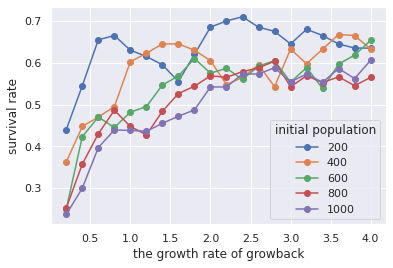

In [19]:
list=[sugar_toushi_growback[200],sugar_toushi_growback[400],sugar_toushi_growback[600],sugar_toushi_growback[800],sugar_toushi_growback[1000]]
for x in range(0,5):
    plt.plot(low,list[x],linestyle='-', marker='o',label=label[x])
plt.legend(title="initial population")
plt.xlabel('the growth rate of growback')
plt.ylabel('survival rate')
plt.show()

In [20]:
sugar_growback_2_600=sugar[sugar["growback"]==2]
sugar_growback_2_600=sugar_growback_2_600[sugar_growback_2_600["initial_population"]==600]
sugar_growback_2_600

,run_number,growback,initial_population,step,count_turtles,max_min_range,survive,top_20,top_40,med_20,low_40,low_20,mean_vision,mean_metabolism
6289,48,2.0,600,0,600,15.0,1.000000,0.272336,0.236139,0.199464,0.162693,0.129369,3.495000,2.460000
6309,48,2.0,600,1,600,21.0,1.000000,0.277467,0.236146,0.199749,0.162000,0.124638,3.495000,2.460000
6322,48,2.0,600,2,600,28.0,1.000000,0.290592,0.236988,0.198852,0.162467,0.111100,3.495000,2.460000
6350,48,2.0,600,3,598,33.0,0.996667,0.306001,0.238304,0.201148,0.158642,0.095905,3.496656,2.454849
6366,48,2.0,600,4,594,35.0,0.990000,0.321077,0.245782,0.200819,0.152736,0.079586,3.498316,2.446128
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7953,48,2.0,600,146,345,410.0,0.575000,0.414247,0.293464,0.182943,0.089045,0.020302,3.689855,1.776812
7962,48,2.0,600,147,345,412.0,0.575000,0.414340,0.293523,0.182887,0.089048,0.020202,3.689855,1.776812
7972,48,2.0,600,148,345,414.0,0.575000,0.414430,0.293505,0.182836,0.089108,0.020120,3.689855,1.776812
7981,48,2.0,600,149,345,416.0,0.575000,0.414616,0.293509,0.182764,0.089087,0.020024,3.689855,1.776812


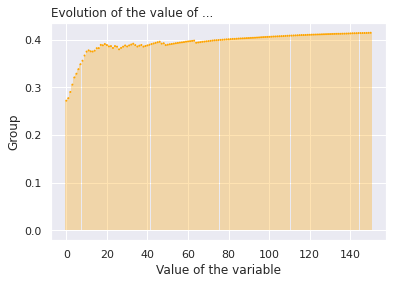

In [21]:

x=sugar_growback_2_600["step"]
y=sugar_growback_2_600["top_20"]
my_color = np.where(y>=0, 'orange', 'skyblue')
# The vertical plot is made using the vline function
plt.vlines(x=x, ymin=0, ymax=y, color=my_color, alpha=0.4)
plt.scatter(x, y, color=my_color, s=1, alpha=1)
 
# Add title and axis names
plt.title("Evolution of the value of ...", loc='left')
plt.xlabel('Value of the variable')
plt.ylabel('Group')

# Show the graph
plt.show()

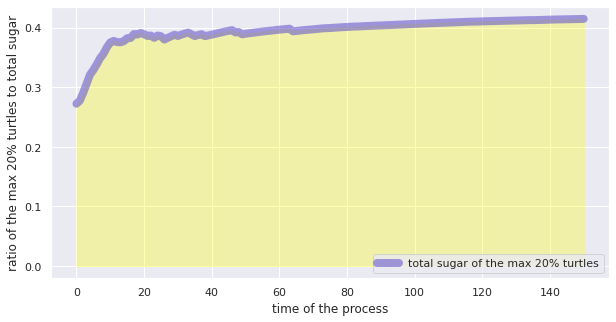

In [22]:
plt.figure(figsize=(10, 5))
plt.fill_between( x, y, color="yellow", alpha=0.3)
plt.plot(x, y, lw=8,color="Slateblue", alpha=0.6,label="total sugar of the max 20% turtles")
plt.legend(loc='lower right')
plt.xlabel('time of the process')
plt.ylabel('ratio of the max 20% turtles to total sugar')
plt.show()

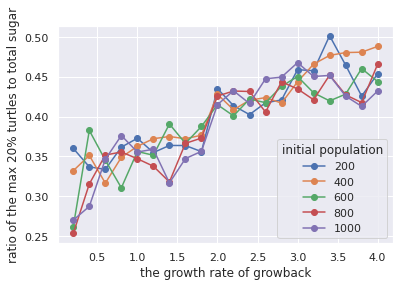

In [23]:
sugar_150
sugar_toushi_growback=sugar_150_growback.pivot_table(index="growback",columns= "initial_population",values="top_20")
list=[sugar_toushi_growback[200],sugar_toushi_growback[400],sugar_toushi_growback[600],sugar_toushi_growback[800],sugar_toushi_growback[1000]]
for x in range(0,5):
    plt.plot(low,list[x],linestyle='-', marker='o',label=label[x])
plt.legend(title="initial population")
plt.xlabel('the growth rate of growback')
plt.ylabel('ratio of the max 20% turtles to total sugar')
plt.show()

In [24]:
sugar_150_growback

,run_number,growback,initial_population,step,count_turtles,max_min_range,survive,top_20,top_40,med_20,low_40,low_20,mean_vision,mean_metabolism
891,11,0.6,200,150,131,355.8,0.655,0.333739,0.304583,0.205080,0.127712,0.028885,3.801527,1.748092
7648,51,2.2,200,150,140,471.8,0.700,0.413667,0.290885,0.175340,0.109394,0.010713,3.707143,2.114286
4119,26,1.2,200,150,123,393.4,0.615,0.354795,0.288007,0.208127,0.099895,0.049176,3.869919,1.878049
5257,36,1.6,200,150,111,404.0,0.555,0.363658,0.286562,0.216799,0.093172,0.039809,3.531532,1.909910
10687,71,3.0,200,150,129,466.0,0.645,0.458758,0.307476,0.169397,0.050562,0.013808,3.542636,1.984496
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11128,55,2.2,1000,150,542,369.8,0.542,0.432344,0.286773,0.207634,0.054945,0.018305,3.835793,1.822878
11473,65,2.6,1000,150,573,370.2,0.573,0.447346,0.270007,0.217566,0.046986,0.018095,3.792321,1.874346
12052,70,2.8,1000,150,588,388.2,0.588,0.449453,0.279986,0.200226,0.051203,0.019132,3.753401,1.865646
7664,40,1.6,1000,150,472,312.8,0.472,0.347266,0.297847,0.170403,0.138825,0.045660,3.851695,1.574153


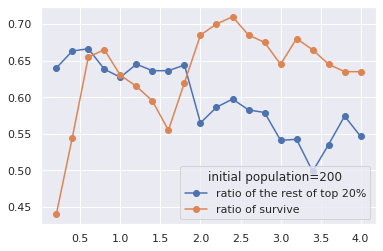

In [25]:
sugar_150_growback["low_80"]=1-sugar_150_growback["top_20"]
back=sugar_150_growback[sugar_150_growback["initial_population"]==200]
back=back.sort_values(['growback'],ascending=True)

plt.plot(back["growback"],back["low_80"],linestyle='-', marker='o',label="ratio of the rest of top 20%")
plt.plot(back["growback"],back["survive"],linestyle='-', marker='o',label="ratio of survive")
plt.plot()
plt.legend(loc="lower right",title="initial population=200")

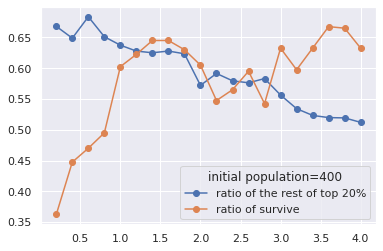

In [26]:
back=sugar_150_growback[sugar_150_growback["initial_population"]==400]
back=back.sort_values(['growback'],ascending=True)
sugar_150_growback["low_80"]=1-sugar_150_growback["top_20"]
plt.plot(back["growback"],back["low_80"],linestyle='-', marker='o',label="ratio of the rest of top 20%")
plt.plot(back["growback"],back["survive"],linestyle='-', marker='o',label="ratio of survive")
plt.plot()
plt.legend(loc="lower right",title="initial population=400")

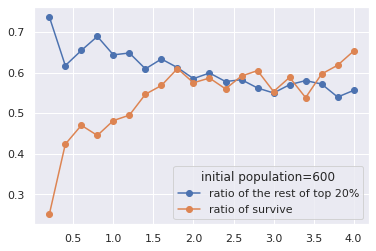

In [27]:
back=sugar_150_growback[sugar_150_growback["initial_population"]==600]
back=back.sort_values(['growback'],ascending=True)
sugar_150_growback["low_80"]=1-sugar_150_growback["top_20"]
plt.plot(back["growback"],back["low_80"],linestyle='-', marker='o',label="ratio of the rest of top 20%")
plt.plot(back["growback"],back["survive"],linestyle='-', marker='o',label="ratio of survive")
plt.plot()
plt.legend(loc="lower right",title="initial population=600")

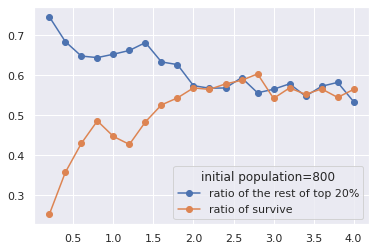

In [28]:
back=sugar_150_growback[sugar_150_growback["initial_population"]==800]
back=back.sort_values(['growback'],ascending=True)
sugar_150_growback["low_80"]=1-sugar_150_growback["top_20"]
plt.plot(back["growback"],back["low_80"],linestyle='-', marker='o',label="ratio of the rest of top 20%")
plt.plot(back["growback"],back["survive"],linestyle='-', marker='o',label="ratio of survive")
plt.plot()
plt.legend(loc="lower right",title="initial population=800")

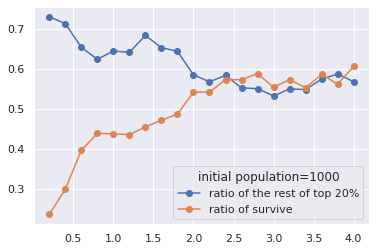

In [29]:
back=sugar_150_growback[sugar_150_growback["initial_population"]==1000]
back=back.sort_values(['growback'],ascending=True)
sugar_150_growback["low_80"]=1-sugar_150_growback["top_20"]
plt.plot(back["growback"],back["low_80"],linestyle='-', marker='o',label="ratio of the rest of top 20%")
plt.plot(back["growback"],back["survive"],linestyle='-', marker='o',label="ratio of survive")
plt.plot()
plt.legend(loc="lower right",title="initial population=1000")